**1.** Use the pandas function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: 

Select all records from `PlaylistTrack` INNER JOIN `Track` on `PlaylistTrack.TrackId = Track.TrackId` that satisfy the condition `Milliseconds < 250000`.

Use the engine: `engine = create_engine('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite')`

In [31]:
import pandas as pd
from sqlalchemy import create_engine

In [36]:
 # Create engine: engine
cosas = pd.read_sql_query('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite',)
cosas.head()

TypeError: read_sql_query() missing 1 required positional argument: 'con'

In [19]:
# Create engine: engine
engine = create_engine('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite')

# Execute query and store records in DataFrame: df
df= pd.read_sql_query ( 'SELECT * \
                        FROM PlaylistTrack \
                          INNER JOIN Track \
                           ON PlaylistTrack.TrackId = Track.TrackId \
                        WHERE Milliseconds < 250000 \
                        ORDER BY Milliseconds DESC' ,engine) #LE PONGO DESC PARA QUE SEA DESCENDENTE
                                                         #SINO EL ORDEN ES ASCENDENTE POR DEFAULT
# Print head of DataFrame
df.head()

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,1556,1556,Some Heads Are Gonna Roll,125,1,3,None,249939,8198617,0.99
1,8,1556,1556,Some Heads Are Gonna Roll,125,1,3,None,249939,8198617,0.99
2,1,1651,1651,The Wanton Song,135,1,1,Robert Plant,249887,8180988,0.99
3,8,1651,1651,The Wanton Song,135,1,1,Robert Plant,249887,8180988,0.99
4,1,1765,1765,Give Me Love,145,1,7,Caetano Veloso e Gilberto Gil,249808,8196331,0.99


**2.** Check which `Composer` has the most tracks on the `PlaylistTrack` table.

In [6]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite')
df1= pd.read_sql_query ('''SELECT* COMPOSER,
                                FROM PlaylistTrack,
                                ''',engine)
#df1= pd.read_sql_query ( '''SELECT COMPOSER, 
 #                       FROM PlaylistTrack P \
  #                        INNER JOIN Track T \
   #                        ON P.TrackId = T.TrackId
    #                       WHERE COMPOSER <> "None"
     #                      GROUP BY T.COMPOSER
      #                     ORDER BY DESC''', engine)
                            
df1.head() ##COUNT(*) as Trackqty

OperationalError: (sqlite3.OperationalError) near "COMPOSER": syntax error
[SQL: SELECT* COMPOSER,
                                FROM PlaylistTrack,
                                ]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

---
Let's work now with the notebook `35. Screapeando datos con Python`. First check if all libraries are installed. If not, use:

`!pip install beautifulsoup4`

`!pip install requests`

**3.** Let's use what we learnt to scrap the next url. Try to get a final pandas dataframe called `df` with he values that you need.

In [30]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [31]:
# Specify url: url
url = 'https://www.dolarhoy.com/'

# Package the request, send the request and catch the response: r
r = requests.get(url)#le tengo q decir a cual url va dirigido el scrapin

# Extract the response as html: html_doc
html_doc = r.text # .text es un parametro q me transforma todo para q lo pueda leer

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)
print(soup.text)




Dólar hoy, Cotización del dólar, precio del dolar | Dolarhoy.com






























DÓLAR

Dolar Oficial
Dolar Blue
Dolar Bolsa
Dolar MEP
Dolar CCL
Dolar Turista
Dolar Bull Exchange



EURO


ORO


OTRAS MONEDAS

Peso uruguayo
Peso chileno
Real brasileño













Dólar oficial promedio 


COMPRA

                        $ 80,00
                    


VENTA
$ 87,00






                        Variación 0.00% 

Actualizado el 01/12/20 08:24






Dólar Blue 


COMPRA
$ 151,00


VENTA
$ 157,00






Actualizado el 01/12/20 08:24








Dólar Bolsa 


COMPRA
$ 146,70


VENTA
$ 146,86






Actualizado el 01/12/20 08:24






Contado con Liqui 


COMPRA
$ 149,37


VENTA
$ 149,54






Actualizado el 01/12/20 08:24




















Dólar Solidario 


VENTA
$ 141,90






Actualizado el 01/12/20 08:24





























Previous



Next



















Previous



Next



* (1) Aclaración importante sobre 'Dolar Bolsa': La compra y venta de "Dolar Bolsa" o

In [32]:
table = []
pattern = '[0-9]+\,[0-9]' # find a regex pattern for numbers with decimals (,)
for sub_link in soup.find_all('div', {'class' : 'pill pill-coti'}):# busque en la pagina un fragmento de codigo q contenga el pill
    currency_name = sub_link.a.get('href')
    print(currency_name)
    subtable = [currency_name]
    
    for p in sub_link.find_all('span', {'class' : 'price'}):
        currency_value = re.findall(pattern, p.text)[0]
        subtable.append(currency_value)
        print(currency_value)
    table.append(subtable)

/cotizaciondolaroficial
80,0
87,0
/cotizaciondolarblue
151,0
157,0
/cotizaciondolarbolsa
146,7
146,8
/cotizaciondolarcontadoconliqui
149,3
149,5
/cotizaciondolarturista
141,9


In [33]:
headers = ['moneda','compra','venta']
df = pd.DataFrame(table, columns=headers)
df

,moneda,compra,venta
0,/cotizaciondolaroficial,"80,0","87,0"
1,/cotizaciondolarblue,"151,0","157,0"
2,/cotizaciondolarbolsa,"146,7","146,8"
3,/cotizaciondolarcontadoconliqui,"149,3","149,5"
4,/cotizaciondolarturista,"141,9",None


**4.** Try to replicate what we did on the previous excercise, but now we will try to get all the values from the tables `Distintas cotizaciones del Dólar` and `Cotizaciones de otras monedas`.

In [37]:
table = []
for sub_link in soup.find_all('div', {'class' : 'table-responisve'}):
    for col in sub_link.find_all('td'):
        try:
            subtable = [col.a.get('href')]
        except:
            subtable.append(re.findall(pattern, col.text)[0])
        if len(subtable) == 3:
            table.append(subtable)

In [39]:
headers = ['moneda','compra','venta']
df = pd.DataFrame(table, columns=headers)
df.head()

,moneda,compra,venta


---
**5.** Use `tweepy` and create a wordcloud with the last 50 tweets from `@elonmusk`. Install the following library:

`!pip install wordcloud`

In [45]:
!pip install wordcloud

In [50]:
import tweepy
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'tweepy'

In [47]:
# Store OAuth authentication credentials in relevant variables
access_token = "1952916806-9WbU9ROPLd4aVPprQZqWJhaW4RSXrBw4oK8A4Ow"
access_token_secret = "gW5iuYPtrTxVhPmQxBemsKz6jCAOqbYx1fT0ewKHFyAkG"
consumer_key = "46pvnSwIVylfWepbPsP4433wL"
consumer_secret = "xWDPHaUkk0ub93qj1DaYgJcO8QtkPUhNFIE7uBAvzbSVLLpLzR"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

NameError: name 'tweepy' is not defined

In [146]:
# get tweets from a given user
def get_tweets(user, limit=10):
    results = api.user_timeline(screen_name=user , count=limit , tweet_mode='extended' )
    tweets = [] # tweet list initially empty
    for r in results :
        # uses regular expression to remove the tweet's URL
        # http takes the start of the url
        # \ S + takes non-white characters (the end of the URL) 
        tweet = re.sub( r'http\S+', '' , r.full_text )
        tweets.append(tweet.replace('\n', '')) # add to list
    return tweets  # returns the list of tweets

In [152]:
# create an api object
api  =  tweepy.API(auth)

# write tweets to a file 'tweets.txt'
tweets = 'your_code_here'
for t in tweets:
    print(t, '\n')

♥️ 

Launch in 5 minutes 

@flcnhvy Yeah, with cooling channels integrated into the chamber walls 

The same propellant is used either for abort or for orbital maneuvering, as one use obviates the other 

Dragon can also hover &amp; land propulsively, but we use the parachutes for maximum safety  

Thrusters are integrated with spacecraft, enabling abort capability all the way to abort for increased safety  

RT @NASA: What song would you play on your ride out to the launch pad? #LaunchAmerica  

RT @SpaceX: Dragon has completed 22 flights to and from the @space_station. It was designed from the beginning with human spaceflight in mi… 

RT @SpaceX: Dragon is the only spacecraft currently flying capable of returning significant amounts of cargo to Earth and is the first priv… 

RT @SpaceX: SpaceX’s custom-tailored suits route the communications and cooling systems and protect the crew in the event of cabin depressu… 

RT @NASA: LIVE NOW: We are ready to #LaunchAmerica. Are you? 🚀Watch c

In [166]:
df = pd.DataFrame('your_code_here', columns=['tweet'])
df.head()

,tweet
0,♥️
1,Launch in 5 minutes
2,"@flcnhvy Yeah, with cooling channels integrate..."
3,The same propellant is used either for abort o...
4,"Dragon can also hover &amp; land propulsively,..."


In [167]:
text = ' '.join(df['your_code_here'])
print("There are {} words in all tweets.".format(len('your_code_here')))

There are 5053 words in all tweets.


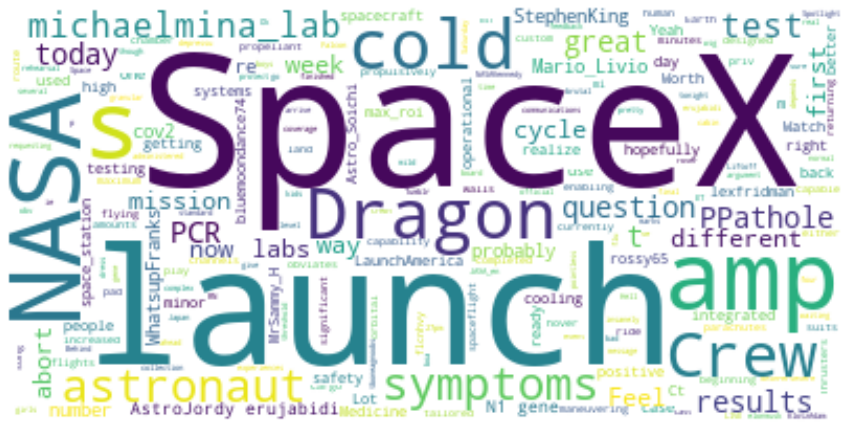

In [174]:
stopwords = set(STOPWORDS)
stopwords.update(['https', ',', 'rt',])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()